<a href="https://colab.research.google.com/github/mr-ayush-agrawal/DL_Notebooks/blob/main/Lect/Data_Augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Augumentation
This is a technique to incrase the dataset.

### Loading Image

In [45]:
# We are getting image vai web.
from PIL import Image
import requests
url = 'https://static01.nyt.com/images/2021/09/14/science/07CAT-STRIPES/07CAT-STRIPES-jumbo.jpg'
im = Image.open(requests.get(url, stream=True).raw)
# im

In [46]:
import tensorflow as tf
import keras
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator, array_to_img, load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt

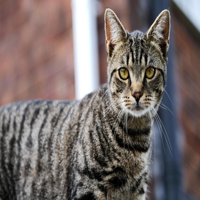

In [47]:
image_array = np.array(im)
im = array_to_img(image_array).resize((200,200))

# plt.imshow(im)
# plt.axis('off')
im

### Generating

In [58]:
datagen = ImageDataGenerator(
            rotation_range= 30,
            shear_range = 0.2,
            zoom_range=0.2,
            horizontal_flip= True,
            vertical_flip= False,
            width_shift_range = 0.2,
            height_shift_range = 0.2,
            rescale=1.0/255.0
        )

In [49]:
arr_img = img_to_array(im)
arr_img.shape

(200, 200, 3)

In [50]:
input_batch = arr_img.reshape(1, 200, 200, 3)

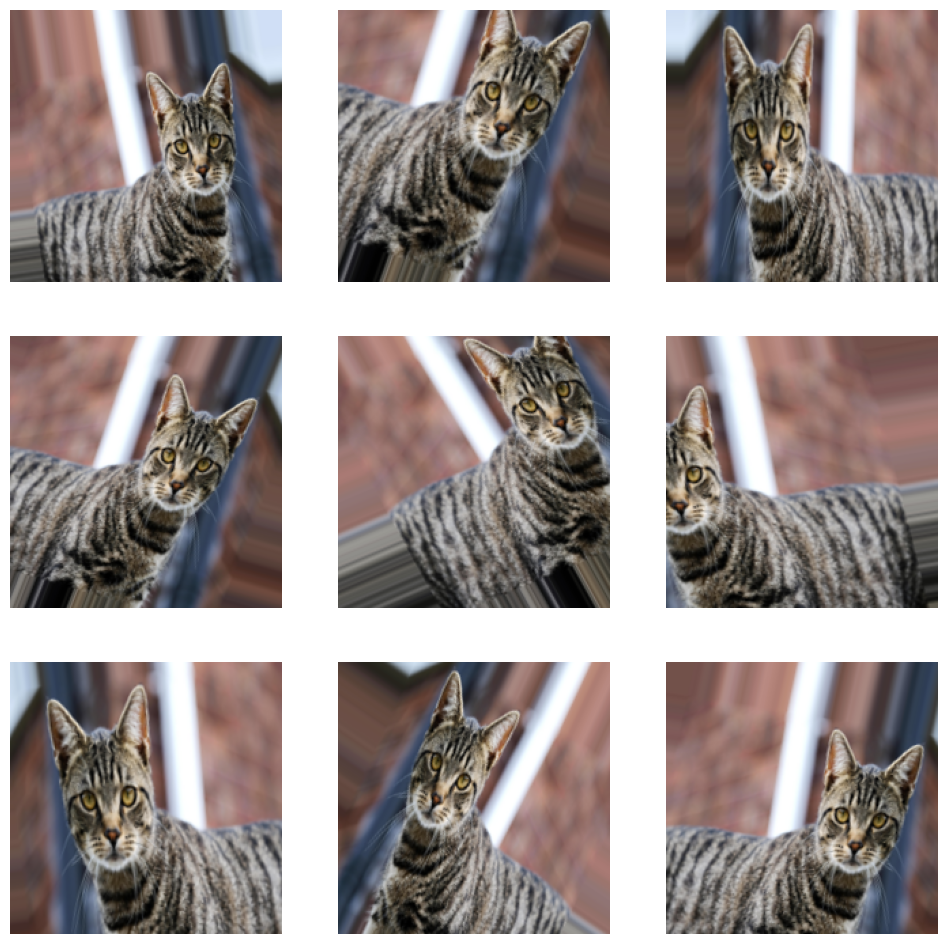

In [59]:
# we will be making 9 images for using data augmentation

plt.figure(figsize=(12,12))
i = 0
for output in datagen.flow(input_batch, batch_size=1):
    output = output.squeeze()  # Remove single-dimensional entries
    # output = output.astype(float) / 255.0  # Normalize to [0.0, 1.0]

    plt.subplot(3, 3, i + 1)
    plt.axis('off')
    plt.imshow(output)
    i += 1

    if i >= 9:
        break
plt.show()